In [125]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [126]:
monkeypox = pd.read_csv("monkeypox.csv")
stored_df = monkeypox.copy ()

In [127]:
print (monkeypox.shape)
print (monkeypox.columns)
print (monkeypox['binary_class'].value_counts ())
print (monkeypox['ternary_class'].value_counts ())

(5787, 19)
Index(['number', 'created_at', 'text', 'source', 'user is verified',
       'user has url', 'user description', 'user created at', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'user location',
       'binary_class', 'ternary_class'],
      dtype='object')
0    4718
1    1069
Name: binary_class, dtype: int64
9    2753
0    1965
1    1069
Name: ternary_class, dtype: int64


Check Nan values

In [128]:
cols = monkeypox.columns
for col in cols:
  isna = monkeypox[col].isna().sum()
  if isna > 0:
    print (col, " has #nan values:", monkeypox[col].isna().sum())

user location  has #nan values: 2


In [129]:
monkeypox =  monkeypox.dropna()
monkeypox = monkeypox.reset_index()

In [130]:
for col in cols:
  isna = monkeypox[col].isna().sum()
  if isna > 0:
    print (col, " has #nan values:", monkeypox[col].isna().sum())

See column stats

In [131]:
display(monkeypox.describe().round(2))

,index,number,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,binary_class,ternary_class
count,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00
mean,2893.22,2906.21,2.74,1.04,13.88,0.87,36798.77,1837.22,60418.87,219.10,0.18,4.47
std,1670.55,1676.47,39.66,9.29,249.39,22.91,518438.25,9587.61,165595.49,2071.33,0.39,4.33
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,1447.00,1456.00,0.00,0.00,0.00,0.00,93.00,157.00,2916.00,0.00,0.00,0.00
50%,2893.00,2906.00,0.00,0.00,0.00,0.00,539.00,550.00,13805.00,3.00,0.00,1.00
75%,4340.00,4356.00,0.00,1.00,2.00,0.00,2730.00,1556.00,50862.00,26.00,0.00,9.00
max,5786.00,5810.00,2281.00,550.00,14561.00,1603.00,22126501.00,436979.00,2735137.00,72255.00,1.00,9.00


https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/ 

#Data Visualization

###Distribution Plots

In [132]:
# import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# to ignore the warnings
from warnings import filterwarnings
# importing pandas as pd
import pandas as pd

In [133]:
monkeypox['user is verified'] = monkeypox['user is verified'].replace({False: 0})
monkeypox['user is verified'] = monkeypox['user is verified'].replace({True: 1})

monkeypox['user has url'] = monkeypox['user has url'].replace({False: 0})
monkeypox['user has url'] = monkeypox['user has url'].replace({True: 1})

In [134]:
numerical_cols = ['number', 'user is verified', 'user has url', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'binary_class', 'ternary_class']
text_cols = ['created at', 'user description', 'user created at', 'user location']

#####New Columns

In [135]:
monkeypox ['acc_age_in_days'] = 0
monkeypox ['acc_age_in_frac'] = 0
for i in range (len (monkeypox)):
  monkeypox ['acc_age_in_days'][i] = monkeypox['user created at'][i].split (' ')[0]
  monkeypox ['acc_age_in_frac'][i] = monkeypox['user created at'][i].split (' ')[1]
monkeypox ['acc_age_in_frac'][0]

'19:22:06'

In [136]:
monkeypox ['post_age_in_days'] = 0
monkeypox ['post_age_in_frac'] = 0
for i in range (len (monkeypox)):
  monkeypox ['post_age_in_days'][i] = monkeypox['created_at'][i].split (' ')[0]
  monkeypox ['post_age_in_frac'][i] = monkeypox['created_at'][i].split (' ')[1]

In [137]:
from datetime import datetime
FMT = '%H:%M:%S'
tdelta = datetime.strptime(monkeypox ['post_age_in_frac'][0], FMT) - datetime.strptime(monkeypox ['acc_age_in_frac'][0], FMT)
print (abs (tdelta.total_seconds()))
print (tdelta.seconds)

33002.0
53398


In [138]:
from datetime import datetime
monkeypox ['acc_age_in_days_at_post'] = 0
monkeypox ['acc_age_in_seconds_at_post'] = 0
date_format = "%Y-%m-%d"
FMT = '%H:%M:%S'
for i in range (len (monkeypox)):
  a = datetime.strptime(monkeypox ['acc_age_in_days'][i], date_format)
  b = datetime.strptime(monkeypox ['post_age_in_days'][i], date_format)
  delta = b - a

  
  tdelta = datetime.strptime(monkeypox ['post_age_in_frac'][i], FMT) - datetime.strptime(monkeypox ['acc_age_in_frac'][i], FMT)

  monkeypox ['acc_age_in_days_at_post'][i] = delta.days

  monkeypox ['acc_age_in_seconds_at_post'][i] = (delta.days*24*60*60) + abs (tdelta.total_seconds())

In [139]:
monkeypox.drop ('post_age_in_days', axis=1, inplace = True)
monkeypox.drop ('acc_age_in_days', axis=1, inplace = True)
print (monkeypox.columns)

Index(['index', 'number', 'created_at', 'text', 'source', 'user is verified',
       'user has url', 'user description', 'user created at', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'user location',
       'binary_class', 'ternary_class', 'acc_age_in_frac', 'post_age_in_frac',
       'acc_age_in_days_at_post', 'acc_age_in_seconds_at_post'],
      dtype='object')


In [140]:
feats = monkeypox.columns.drop (['binary_class', 'ternary_class'])
labels = ['binary_class', 'ternary_class']

print (feats)

Index(['index', 'number', 'created_at', 'text', 'source', 'user is verified',
       'user has url', 'user description', 'user created at', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'user location',
       'acc_age_in_frac', 'post_age_in_frac', 'acc_age_in_days_at_post',
       'acc_age_in_seconds_at_post'],
      dtype='object')


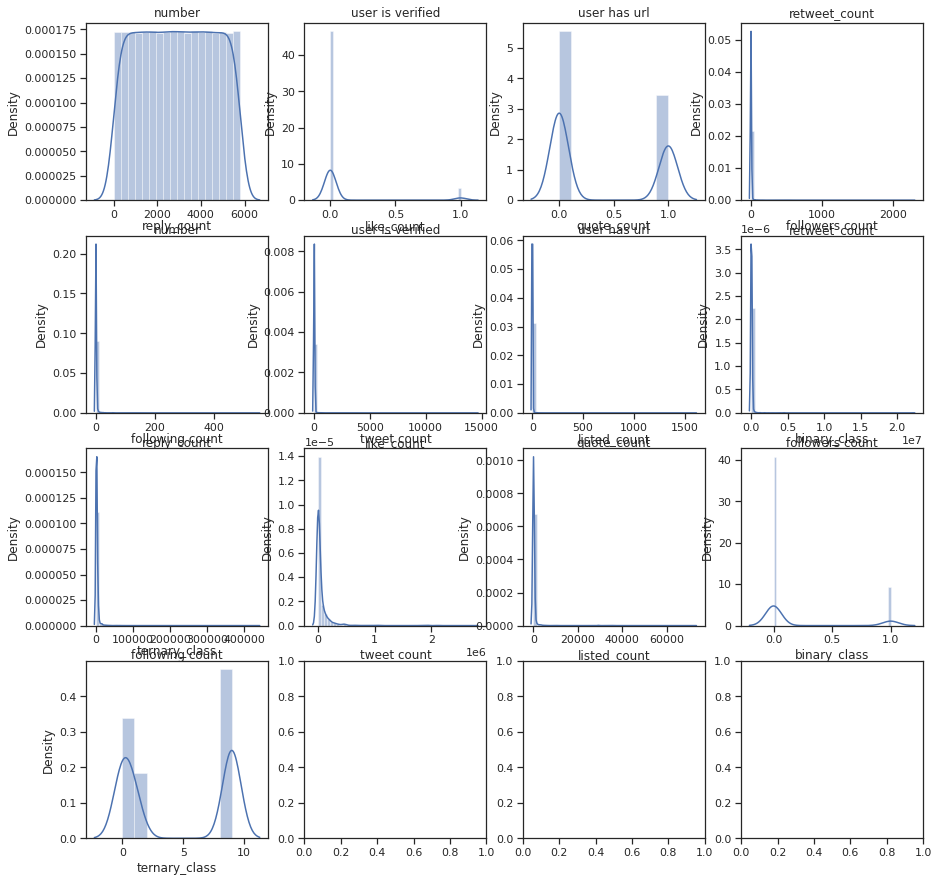

In [141]:
# check
fig, axes = plt.subplots(nrows = 4, ncols = 4)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, numerical_cols):
  sns.distplot(monkeypox[col], ax = ax)
  ax.set_title(col)

In [142]:
# plot scatteSr matrix using seaborn
# here four lists have been made instead of one/two, to make the plots easier to view/understand
numerical_cols1 = ['number', 'user is verified', 'user has url', 'retweet_count', 'reply_count', 'like_count', 'binary_class']
numerical_cols2 = ['quote_count', 'followers count', 'following count', 'tweet count', 'listed_count', 'acc_age_in_days_at_post', 'binary_class']
numerical_cols3 = ['number', 'user is verified', 'user has url', 'retweet_count', 'reply_count', 'like_count', 'ternary_class']
numerical_cols4 = ['quote_count', 'followers count', 'following count', 'tweet count', 'listed_count', 'acc_age_in_days_at_post', 'ternary_class']


# col_list = numerical_cols1
# print (col_list)

# sns.set_theme(style="ticks")
# sns.pairplot(monkeypox[col_list], hue='binary_class', diag_kind='kde')

In [143]:
# col_list = numerical_cols2
# print (col_list)

# sns.set_theme(style="ticks")
# sns.pairplot(monkeypox[col_list], hue='binary_class', diag_kind='kde')

In [144]:
# col_list = numerical_cols3
# print (col_list)

# sns.set_theme(style="ticks")
# sns.pairplot(monkeypox[col_list], hue='ternary_class', diag_kind='kde')

['quote_count', 'followers count', 'following count', 'tweet count', 'listed_count', 'acc_age_in_days_at_post', 'ternary_class']


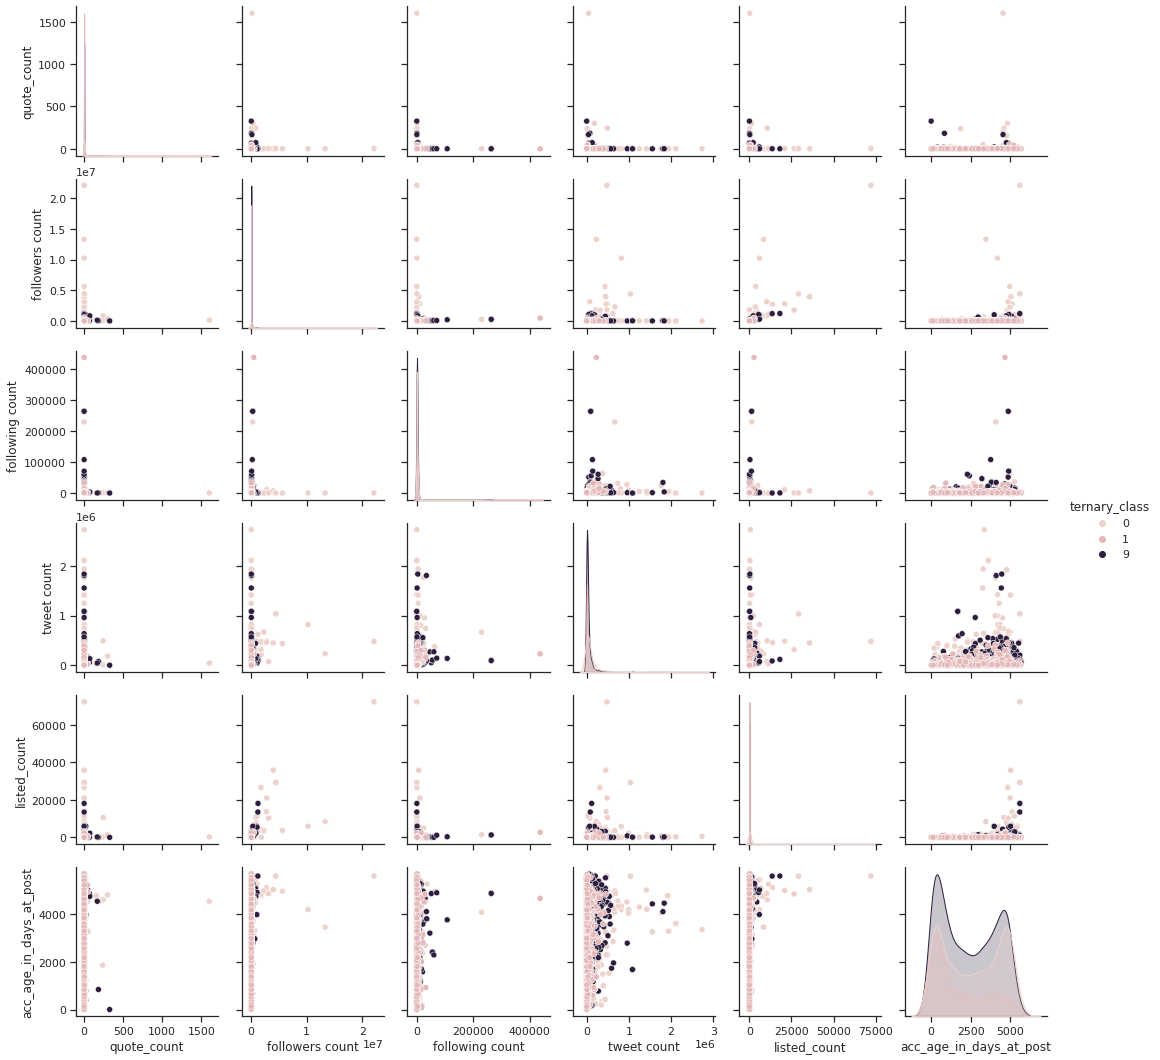

In [145]:
col_list = numerical_cols4
print (col_list)

sns.set_theme(style="ticks")
sns.pairplot(monkeypox[col_list], hue='ternary_class', diag_kind='kde') 

###Barplot

In [146]:
monkeypox['binary_class'] = monkeypox['binary_class'].replace({0: "Not Misinformation"})
monkeypox['binary_class'] = monkeypox['binary_class'].replace({1: "Misinformation"})

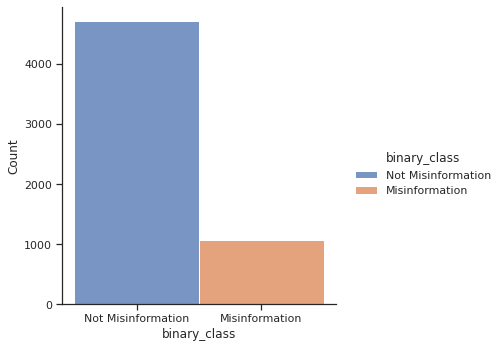

In [147]:
plt = sns.displot (data=monkeypox, x="binary_class", hue='binary_class', multiple="stack")

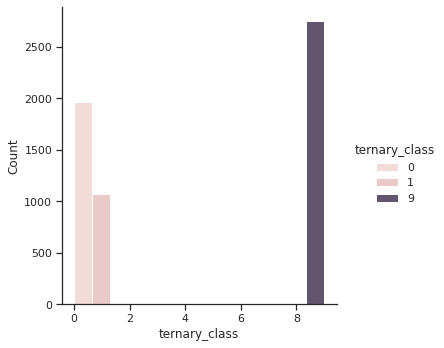

In [148]:
plt = sns.displot (data=monkeypox, x="ternary_class", hue='ternary_class', multiple="stack")

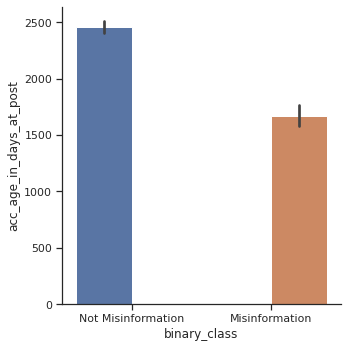

In [149]:
sns.catplot(x = "binary_class",       # x variable name
            y = "acc_age_in_days_at_post",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

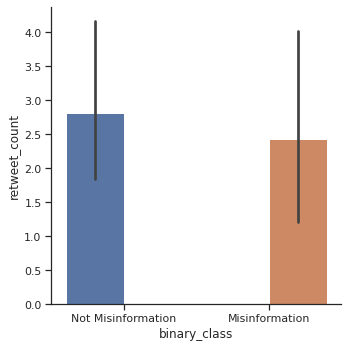

In [150]:
sns.catplot(x = "binary_class",       # x variable name
            y = "retweet_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

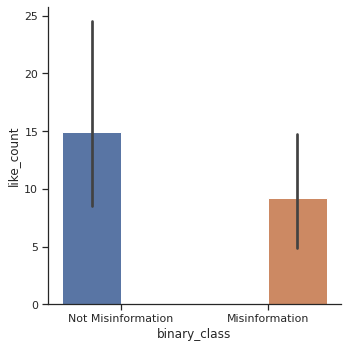

In [151]:
sns.catplot(x = "binary_class",       # x variable name
            y = "like_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

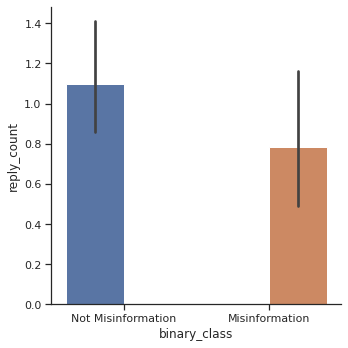

In [152]:
sns.catplot(x = "binary_class",       # x variable name
            y = "reply_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

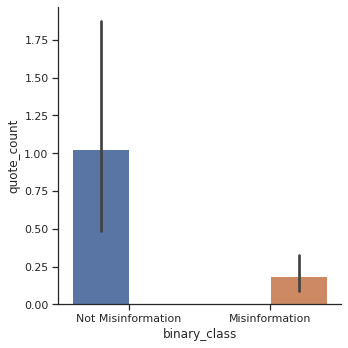

In [153]:
sns.catplot(x = "binary_class",       # x variable name
            y = "quote_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

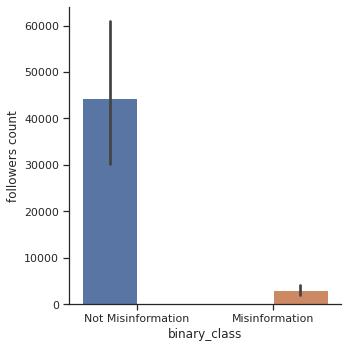

In [154]:
sns.catplot(x = "binary_class",       # x variable name
            y = "followers count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

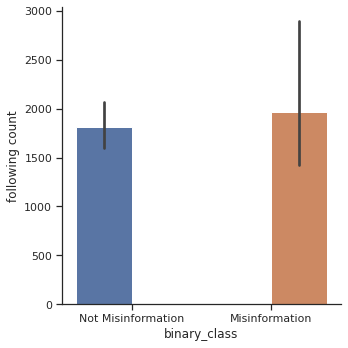

In [155]:
sns.catplot(x = "binary_class",       # x variable name
            y = "following count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

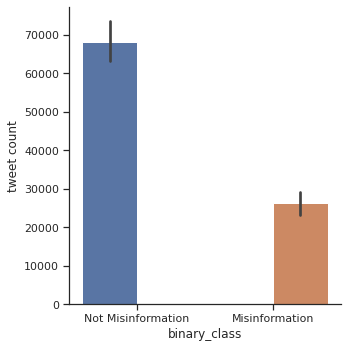

In [156]:
sns.catplot(x = "binary_class",       # x variable name
            y = "tweet count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

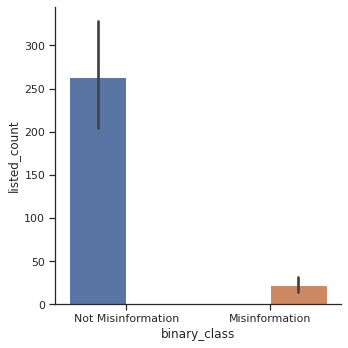

In [157]:
sns.catplot(x = "binary_class",       # x variable name
            y = "listed_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

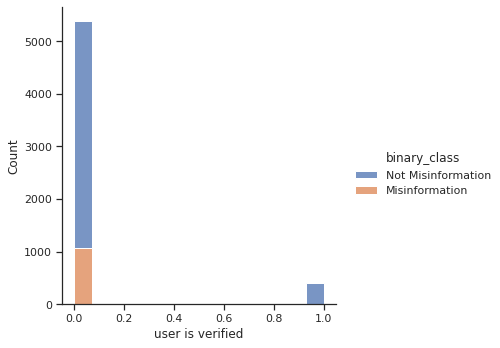

In [158]:
# for col in numerical_cols[:-2]:
plt = sns.displot (data=monkeypox, x="user is verified", hue="binary_class", multiple="stack")

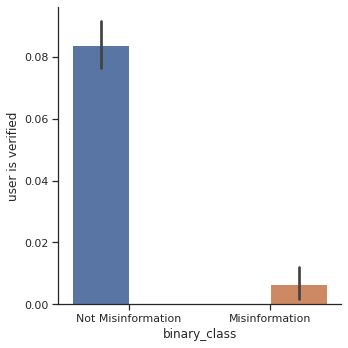

In [159]:
sns.catplot(x = "binary_class",       # x variable name
            y = "user is verified",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

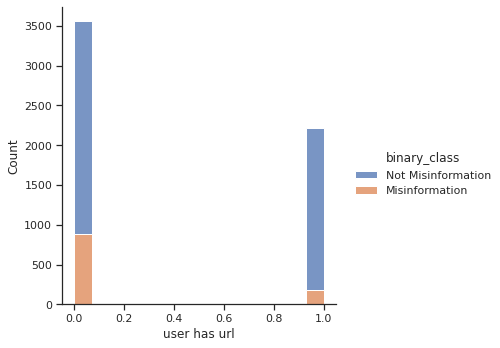

In [160]:
plt = sns.displot (data=monkeypox, x="user has url", hue="binary_class", multiple="stack")

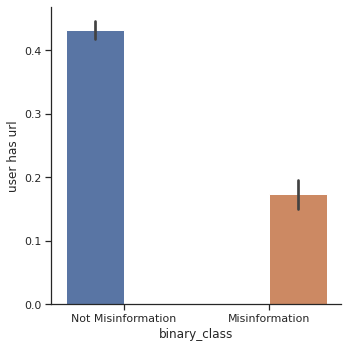

In [161]:
sns.catplot(x = "binary_class",       # x variable name
            y = "user has url",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

###Correlation

In [162]:
def correlation(df, method_name, bound): 
    print(method_name, " Correlation:\n")
    xCorr = df.corr(method = method_name).unstack()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.sort_values(kind="quicksort", ascending=False).drop_duplicates()
    print(xFlattened)
    print ('\n')
    return xFlattened

In [163]:
correlation (monkeypox, "spearman", bound=0.4)
correlation (monkeypox, "pearson", bound=0.4)
correlation (monkeypox, "kendall", bound=0.4)
# print (c[0][0])

spearman  Correlation:

acc_age_in_seconds_at_post  acc_age_in_days_at_post       0.999999
listed_count                followers count               0.793397
following count             followers count               0.701459
acc_age_in_days_at_post     listed_count                  0.600950
listed_count                acc_age_in_seconds_at_post    0.600942
tweet count                 followers count               0.599132
like_count                  retweet_count                 0.578842
tweet count                 listed_count                  0.567290
ternary_class               index                         0.541721
acc_age_in_days_at_post     followers count               0.533131
followers count             acc_age_in_seconds_at_post    0.533112
listed_count                following count               0.509122
acc_age_in_seconds_at_post  tweet count                   0.497583
tweet count                 acc_age_in_days_at_post       0.497579
reply_count                 like_count

acc_age_in_seconds_at_post  acc_age_in_days_at_post       0.999698
listed_count                followers count               0.628649
followers count             following count               0.528782
retweet_count               like_count                    0.525456
listed_count                acc_age_in_days_at_post       0.444866
                            acc_age_in_seconds_at_post    0.444716
followers count             tweet count                   0.429888
quote_count                 retweet_count                 0.425161
like_count                  reply_count                   0.424148
tweet count                 listed_count                  0.416631
dtype: float64

###Outliers

https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/

Old Shape:  (5785, 24)


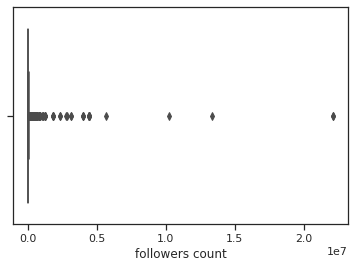

In [164]:
# one feature as example
new_df = monkeypox.copy ()
print("Old Shape: ", new_df.shape)  
col = 'followers count'
sns.boxplot(x=col, data=new_df)

Index(['index', 'number', 'created_at', 'text', 'source', 'user is verified',
       'user has url', 'user description', 'user created at', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'user location',
       'acc_age_in_frac', 'post_age_in_frac', 'acc_age_in_days_at_post',
       'acc_age_in_seconds_at_post'],
      dtype='object')
New Shape:  (4932, 24)


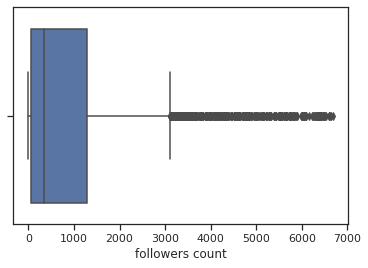

In [165]:
print (feats)
col = 'followers count'

# IQR
Q1 = np.percentile(new_df[col], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(new_df[col], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
# Upper bound
upper = np.where(new_df[col] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(new_df[col] <= (Q1-1.5*IQR))
  
# Removing the Outliers
new_df.drop(upper[0], inplace = True)
new_df.drop(lower[0], inplace = True)
  
print("New Shape: ", new_df.shape)
  
sns.boxplot(x=col, data=new_df)

### Age and Followers Count Binned

In [166]:
df5 = monkeypox.copy ()
df5['acc_age_in_seconds_at_post'] = df5['acc_age_in_seconds_at_post']/(3600*24*30)
print (df5['acc_age_in_seconds_at_post'].max(), df5['acc_age_in_seconds_at_post'].min ())

189.30057021604938 0.00036342592592592595


In [167]:
bins = [0, 1, 5, 10, 25, 50]
df5['age_binned_months'] = 0

In [168]:
for i in range (monkeypox.shape[0]):
  if df5['acc_age_in_seconds_at_post'][i] >= 0 and df5['acc_age_in_seconds_at_post'][i] < 1:
    df5['age_binned_months'][i] = "[0, 1)"
  elif df5['acc_age_in_seconds_at_post'][i] >= 1 and df5['acc_age_in_seconds_at_post'][i] < 5:
    df5['age_binned_months'] [i] = "[1, 5)"
  elif df5['acc_age_in_seconds_at_post'][i] >= 5 and df5['acc_age_in_seconds_at_post'][i] < 10:
    df5['age_binned_months'] [i] = "[5, 10)"
  elif df5['acc_age_in_seconds_at_post'][i] >= 10 and df5['acc_age_in_seconds_at_post'][i] < 25:
    df5['age_binned_months'] [i] = "[10, 25)"
  elif df5['acc_age_in_seconds_at_post'][i] >= 25 and df5['acc_age_in_seconds_at_post'][i] < 50:
    df5['age_binned_months'] [i] = "[25, 50)"
  elif df5['acc_age_in_seconds_at_post'][i] >= 50 and df5['acc_age_in_seconds_at_post'][i] < 100:
    df5['age_binned_months'] [i] = "[50, 100)"
  elif df5['acc_age_in_seconds_at_post'][i] >= 100 and df5['acc_age_in_seconds_at_post'][i] < 200:
    df5['age_binned_months'] [i] = "[100, 200)"

In [169]:
df5['age_binned_months'].unique ()

array(['[100, 200)', '[25, 50)', '[10, 25)', '[50, 100)', '[0, 1)',
       '[5, 10)', '[1, 5)'], dtype=object)

Text(14.36305486111111, 0.5, 'Count')

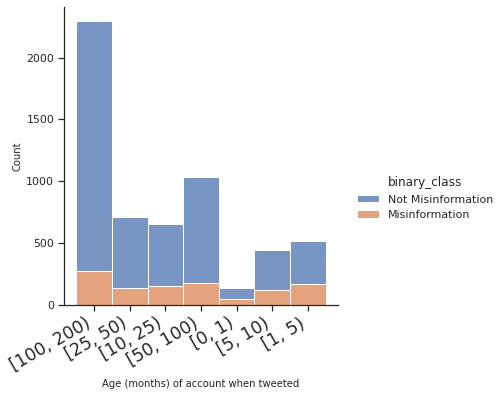

In [170]:
df2 = df5[df5['binary_class'] == "Not Misinformation"]
df3 = df5[df5['binary_class'] == "Misinformation"]

import matplotlib.pyplot as plt
p = sns.displot (data=df5, x="age_binned_months", hue="binary_class", multiple="stack")
plt.xticks(
    rotation=30, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
    # ticks=x_age
)
plt.xlabel("Age (months) of account when tweeted", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

In [171]:
vals = ['[0, 1)', '[1, 5)', '[5, 10)', '[10, 25)', '[25, 50)', '[50, 100)', '[100, 200)']
print ('Percentage of misinformation tweets in each age (months) group:')
for val in vals:
  df6 = df5[df5['age_binned_months'] == val]
  misinfo = df6[df6['binary_class'] == "Misinformation" ]
  true_info = df6[df6['binary_class'] == "Not Misinformation"]

  print (val, "-->", (misinfo.shape[0] / df6.shape[0])*100, "%")


Percentage of misinformation tweets in each age (months) group:
[0, 1) --> 33.57664233576642 %
[1, 5) --> 32.88201160541586 %
[5, 10) --> 26.47058823529412 %
[10, 25) --> 23.08868501529052 %
[25, 50) --> 18.96067415730337 %
[50, 100) --> 17.37864077669903 %
[100, 200) --> 11.818578281726994 %


###Followers Distribution

In [172]:
df6 = monkeypox.copy ()
df6['followers_binned'] = 0
for i in range (monkeypox.shape[0]):
  if df6['followers count'][i] >= 0 and df6['followers count'][i] < 25:
    df6['followers_binned'][i] = "1"
    # print ('hi')
  elif df6['followers count'][i] >= 25 and df6['followers count'][i] < 50:
    df6['followers_binned'][i] = "2"
  elif df6['followers count'][i] >= 50 and df6['followers count'][i] < 100:
    df6['followers_binned'][i] = "3"
  elif df6['followers count'][i] >= 100 and df6['followers count'][i] < 1000:
    df6['followers_binned'][i] = "4"
  else:
    df6['followers_binned'][i] = "5"

Text(14.36305486111111, 0.5, 'Count')

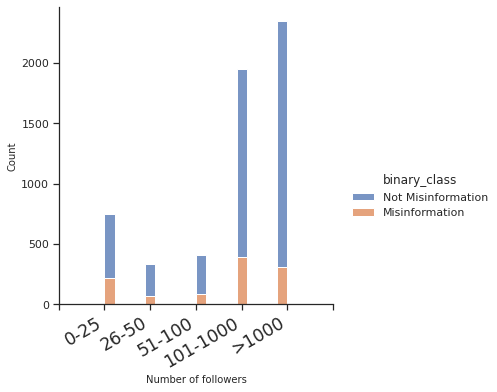

In [173]:
import matplotlib.pyplot as plt
p = sns.displot (data=df6, x="followers_binned", hue="binary_class", multiple="stack")
plt.xticks(
    rotation=30, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
    # ticks=x_age
)
p.set_xticklabels (['', '0-25', '26-50', '51-100', '101-1000', '>1000'])
plt.xlabel("Number of followers", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

In [174]:
labels = ['[0, 25)', '[25, 50)', '[50, 100)', '[100, 1000)', '[1000-)']
vals = ['1', '2', '3', '4', '5']
print ('Percentage of misinformation tweets in each followers count group:')
i = 0
for val in vals:
  df7 = df6[df6['followers_binned'] == int (val)]
  misinfo = df7[df7['binary_class'] == "Misinformation" ]
  true_info = df7[df7['binary_class'] == "Not Misinformation"]
  if df7.shape[0] > 0:
    print (labels[i], "-->", (misinfo.shape[0] / df7.shape[0])*100, "%")
  i += 1

Percentage of misinformation tweets in each followers count group:
[0, 25) --> 28.62849533954727 %
[25, 50) --> 20.8955223880597 %
[50, 100) --> 20.493827160493826 %
[100, 1000) --> 20.184899845916796 %
[1000-) --> 13.123135918193437 %
